# <font color="green">Learning Curve Results</font>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_hist(folder):
    hist_sum_loss = np.zeros(50)
    hist_sum_acc = np.zeros(50)
    hist_sum_acc_val = np.zeros(50)
    hist_sum_loss_val = np.zeros(50)
    for i in range(10):
        file = folder+str(i)
        with open(file, 'rb') as fp:
            hist = pickle.load(fp)
            hist_sum_loss += np.array(hist['loss'])
            hist_sum_acc += np.array(hist['acc'])
            hist_sum_acc_val += np.array(hist['val_acc'])
            hist_sum_loss_val += np.array(hist['val_loss'])
            
    return hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val


In [3]:
def plot_loss(hist_sum_loss_mean, hist_sum_loss_val_mean, legend_1, legend_2):
    
    plt.plot(hist_sum_loss_mean)
    plt.plot(hist_sum_loss_val_mean)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend([legend_1, legend_2], loc='upper right')
    plt.show()

In [4]:
def plot_accuracy(hist_sum_acc_mean, hist_sum_acc_val_mean, legend_1, legend_2):
    plt.plot(hist_sum_acc_mean)
    plt.plot(hist_sum_acc_val_mean)
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend([legend_1, legend_2], loc='lower right')
    plt.show()


In [5]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/Parseval/history_Parseval'

In [6]:
hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val = load_hist(folder)
hist_sum_loss_mean = hist_sum_loss/10
hist_sum_acc_mean = hist_sum_acc/10
hist_sum_acc_val_mean = hist_sum_acc_val/10
hist_sum_loss_val_mean = hist_sum_loss_val/10

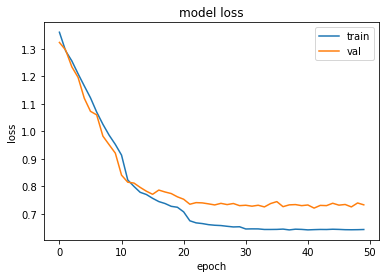

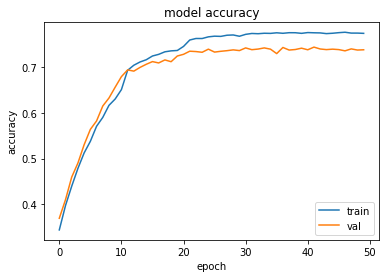

In [7]:
plot_loss(hist_sum_loss_mean, hist_sum_loss_val_mean, 'train', 'val')
plot_accuracy(hist_sum_acc_mean, hist_sum_acc_val_mean, 'train', 'val')

<font color="green">ResNet Result Non-Adversarial</font>

In [8]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/ResNet/history_ResNet'
hist_sum_acc_res, hist_sum_loss_res, hist_sum_acc_val_res, hist_sum_loss_val_res = load_hist(folder)
hist_res_sum_loss_mean = hist_sum_loss_res/10
hist_res_sum_acc_mean = hist_sum_acc_res/10
hist_res_sum_acc_val_mean = hist_sum_acc_val_res/10
hist_res_sum_loss_val_mean = hist_sum_loss_val_res/10

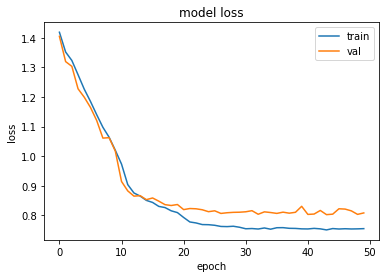

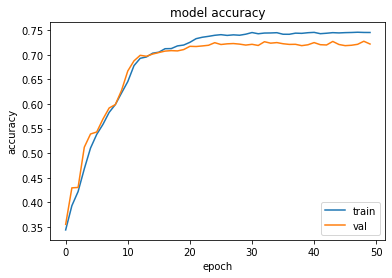

In [9]:
plot_loss(hist_res_sum_loss_mean, hist_res_sum_loss_val_mean, 'train', 'val')
plot_accuracy(hist_res_sum_acc_mean, hist_res_sum_acc_val_mean, 'train', 'val')

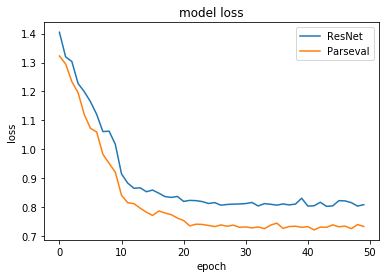

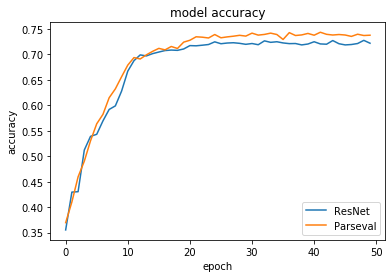

In [10]:
plot_loss(hist_res_sum_loss_val_mean, hist_sum_loss_val_mean, 'ResNet', 'Parseval')
plot_accuracy(hist_res_sum_acc_val_mean, hist_sum_acc_val_mean, 'ResNet', 'Parseval')

# <font color="green">Adversarial Training</font>

## <font color="blue">Parseval</font>

In [11]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/Parseval_Adv/history_adv_parseval'

In [12]:
hist_sum_acc, hist_sum_loss, hist_sum_acc_val, hist_sum_loss_val = load_hist(folder)
hist_sum_loss_mean = hist_sum_loss/10
hist_sum_acc_mean = hist_sum_acc/10
hist_sum_acc_val_mean = hist_sum_acc_val/10
hist_sum_loss_val_mean = hist_sum_loss_val/10

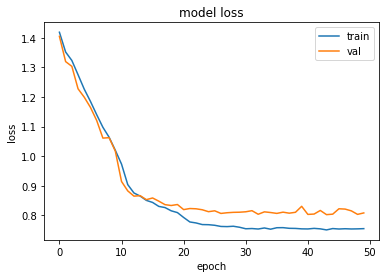

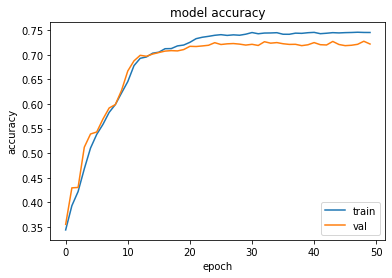

In [13]:
plot_loss(hist_res_sum_loss_mean, hist_res_sum_loss_val_mean, 'train', 'val')
plot_accuracy(hist_res_sum_acc_mean, hist_res_sum_acc_val_mean, 'train', 'val')

## <font color="blue">ResNet</font>

In [14]:
folder = '/home/sefika/adversarial_examples_parseval_net/src/logs/history/ResNet_Adv/history_adv_ResNet'
hist_sum_acc_res, hist_sum_loss_res, hist_sum_acc_val_res, hist_sum_loss_val_res = load_hist(folder)
hist_res_sum_loss_mean = hist_sum_loss_res/10
hist_res_sum_acc_mean = hist_sum_acc_res/10
hist_res_sum_acc_val_mean = hist_sum_acc_val_res/10
hist_res_sum_loss_val_mean = hist_sum_loss_val_res/10

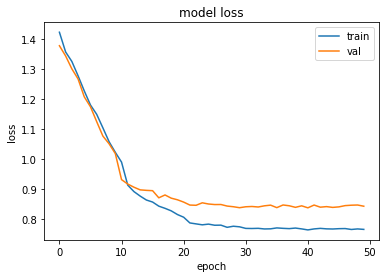

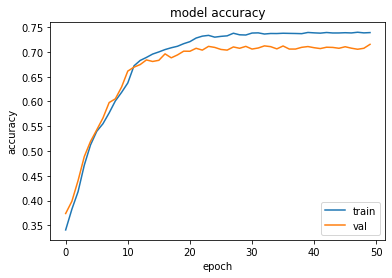

In [15]:
plot_loss(hist_res_sum_loss_mean, hist_res_sum_loss_val_mean, 'train', 'val')
plot_accuracy(hist_res_sum_acc_mean, hist_res_sum_acc_val_mean, 'train', 'val')

## <font color="magenta">Compare Models</font>

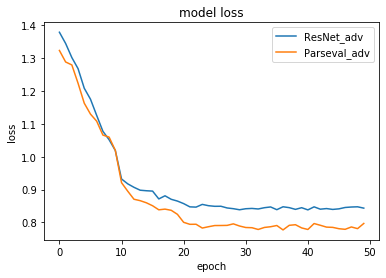

In [16]:
plot_loss(hist_res_sum_loss_val_mean, hist_sum_loss_val_mean, 'ResNet_adv', 'Parseval_adv')

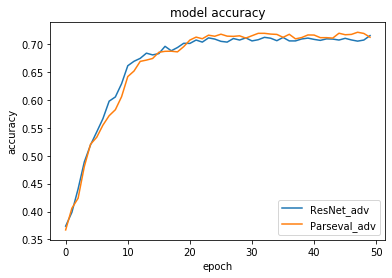

In [17]:
plot_accuracy(hist_res_sum_acc_val_mean, hist_sum_acc_val_mean, 'ResNet_adv', 'Parseval_adv')

# <font color="purple">Conclusion</font>

It can be seen that Parseval network has better performance than ResNet